In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['Total'] = df['math score'] + df['reading score'] + df['writing score']

In [ ]:
def assign_grade(total):
  if total>=250:
    return "A"
  elif total>=200:
    return "B"
  elif total>=150:
    return "C"
  elif total>=100:
    return "D"
  else:
    return "F"

In [ ]:
df['Grade'] = df['Total'].apply(assign_grade)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,B
1,female,group C,some college,standard,completed,69,90,88,247,B
2,female,group B,master's degree,standard,none,90,95,93,278,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,D
4,male,group C,some college,standard,none,76,78,75,229,B


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("\n Summary Statistics:\n", df.describe())
print("\n Grade Counts:\n", df["Grade"].value_counts())
print("\n Missing Values:\n", df.isnull().sum())



 Summary Statistics:
        math score  reading score  writing score        Total
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000
std      15.16308      14.600192      15.195657    42.771978
min       0.00000      17.000000      10.000000    27.000000
25%      57.00000      59.000000      57.750000   175.000000
50%      66.00000      70.000000      69.000000   205.000000
75%      77.00000      79.000000      79.000000   233.000000
max     100.00000     100.000000     100.000000   300.000000

 Grade Counts:
 Grade
B    417
C    341
A    139
D     88
F     15
Name: count, dtype: int64

 Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total                          0
Grade             

<Figure size 1000x500 with 0 Axes>

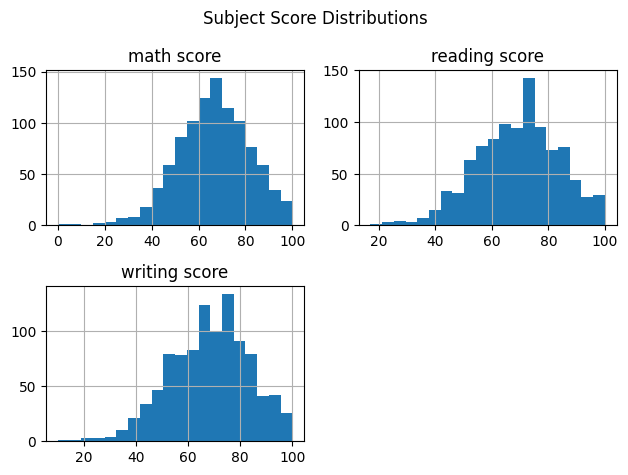

In [ ]:
plt.figure(figsize=(10, 5))
df[['math score', 'reading score', 'writing score']].hist(bins=20)
plt.suptitle("Subject Score Distributions")
plt.tight_layout()
plt.show()

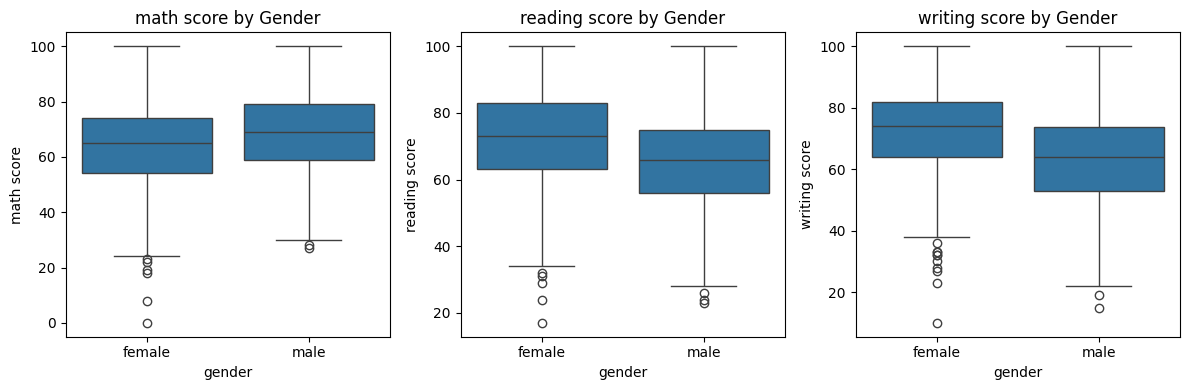

In [ ]:
plt.figure(figsize=(12, 4))
for i, subject in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='gender', y=subject, data=df)
    plt.title(f"{subject} by Gender")
plt.tight_layout()
plt.show()


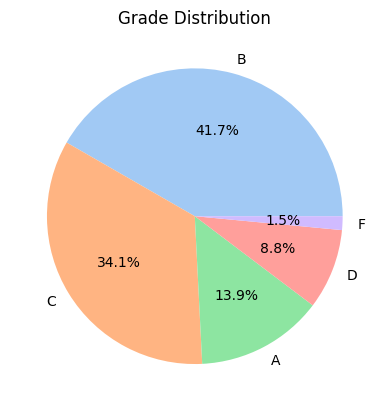

In [ ]:
df["Grade"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Grade Distribution")
plt.ylabel("")
plt.show()


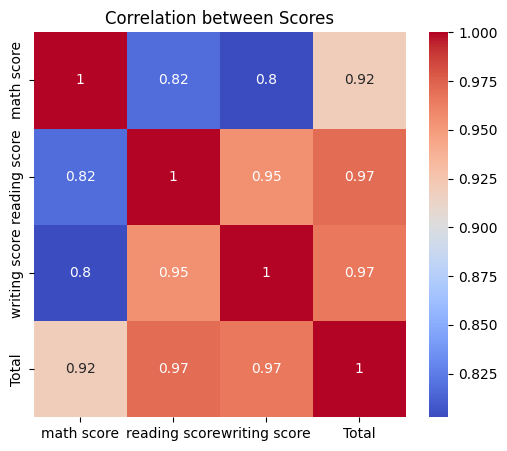

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'Total']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()

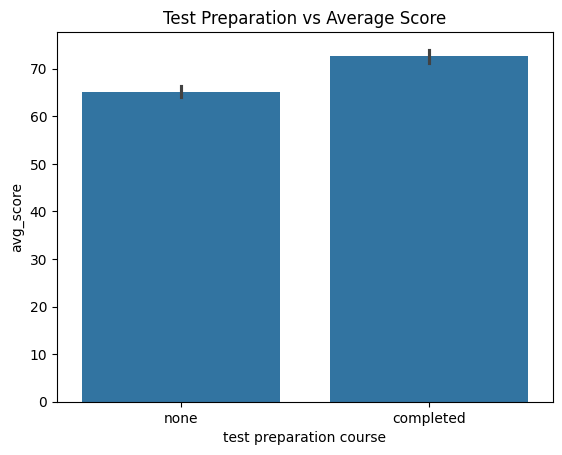

In [ ]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.barplot(x='test preparation course', y='avg_score', data=df)
plt.title("Test Preparation vs Average Score")
plt.show()

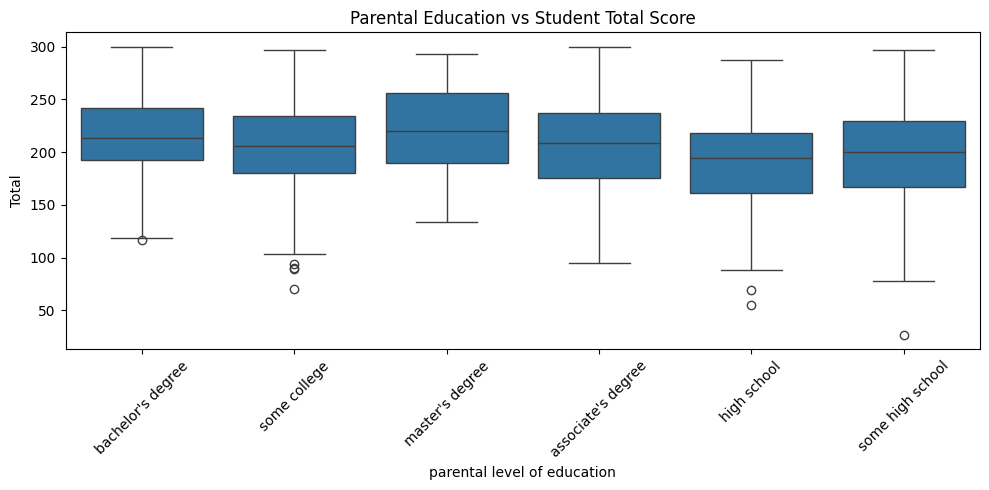

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental level of education', y='Total', data=df)
plt.title("Parental Education vs Student Total Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Grade_encoded'] = le.fit_transform(df['Grade'])

In [ ]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Grade,avg_score,Grade_encoded
447,male,group C,high school,standard,completed,86,81,80,247,B,82.333333,1
480,male,group B,high school,standard,completed,73,71,68,212,B,70.666667,1
813,male,group E,some high school,standard,completed,87,84,76,247,B,82.333333,1
492,female,group C,some college,standard,none,83,83,90,256,A,85.333333,0
227,male,group D,high school,standard,none,57,50,54,161,C,53.666667,2


In [ ]:
X = df[['math score', 'reading score', 'writing score']]
y = df['Grade_encoded']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           A       0.95      1.00      0.98        21
           B       0.99      0.97      0.98        86
           C       0.94      0.97      0.96        66
           D       0.95      0.86      0.90        21
           F       0.86      1.00      0.92         6

    accuracy                           0.96       200
   macro avg       0.94      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
new_student = [[75, 80, 85]]
predicted = model.predict(new_student)
grade = le.inverse_transform(predicted)
print("Predicted Grade:", grade[0])


Predicted Grade: B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
